## Evaluación Segundo Bimestre

### Tema:  Reducción de dimensionalidad - LDA

Integrantes:

- Miguel Roberto Narvaez Román
- Juan José Yanza Herrera

### Imports necesarios

In [176]:
import numpy as np
import pandas as pd
import seaborn as sb

import statsmodels.formula.api as smf

### Cargamos los datos de entrada

In [200]:

data = pd.read_csv("dataset_Facebook.csv", sep = ';')
data = data.fillna(0)

data['like'] = data['like'].astype('int64')

### Re-Indexamiento de columnas para dejar la variable dependiente al final

In [201]:
data = data.reindex(columns=['Page total likes','Type', 'Category','Post Month','Post Weekday','Post Hour', 'Paid', 'Lifetime Post Total Reach', 'Lifetime Post Total Impressions', 'Lifetime Engaged Users', 'Lifetime Post Consumers', 'Lifetime Post Consumptions', 'Lifetime Post Impressions by people who have liked your Page', 'Lifetime Post reach by people who like your Page', 'Lifetime People who have liked your Page and engaged with your post', 'comment', 'like', 'Total Interactions', 'share'])
data


,Page total likes,Type,Category,Post Month,Post Weekday,Post Hour,Paid,Lifetime Post Total Reach,Lifetime Post Total Impressions,Lifetime Engaged Users,Lifetime Post Consumers,Lifetime Post Consumptions,Lifetime Post Impressions by people who have liked your Page,Lifetime Post reach by people who like your Page,Lifetime People who have liked your Page and engaged with your post,comment,like,Total Interactions,share
0,139441,Photo,2,12,4,3,0.0,2752,5091,178,109,159,3078,1640,119,4,79,100,17.0
1,139441,Status,2,12,3,10,0.0,10460,19057,1457,1361,1674,11710,6112,1108,5,130,164,29.0
2,139441,Photo,3,12,3,3,0.0,2413,4373,177,113,154,2812,1503,132,0,66,80,14.0
3,139441,Photo,2,12,2,10,1.0,50128,87991,2211,790,1119,61027,32048,1386,58,1572,1777,147.0
4,139441,Photo,2,12,2,3,0.0,7244,13594,671,410,580,6228,3200,396,19,325,393,49.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,85093,Photo,3,1,7,2,0.0,4684,7536,733,708,985,4750,2876,392,5,53,84,26.0
496,81370,Photo,2,1,5,8,0.0,3480,6229,537,508,687,3961,2104,301,0,53,75,22.0
497,81370,Photo,1,1,5,2,0.0,3778,7216,625,572,795,4742,2388,363,4,93,115,18.0
498,81370,Photo,3,1,4,11,0.0,4156,7564,626,574,832,4534,2452,370,7,91,136,38.0


# Data que utilizaremoas para la reducción con LDA

In [202]:

data_cuantitativos= data.drop(['Type'], axis=1)

#### X = variables independientes  | Y = variables dependientes

In [203]:
X = data_cuantitativos.iloc[:, 0:16].values
y = data_cuantitativos.iloc[:, 16].values

### Dividivmos el conjunto de datos en muestra de entrenamiento y muestra de prueba
- 80% entrenamiento
- 20% test

In [204]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size = 0.2, 
                                                    random_state = 0)


### Ajuste de Escalas

Estándariza los datos eliminando la media y escalando los datos de forma que su varianza sea igual a 1.

In [205]:

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

### Aplicando LDA

El método toma dos parámetros: el X_train y el y_train. Sin embargo, en el caso de PCA, el transform El método solo requiere un parámetro, es decir X_train. Esto refleja el hecho de que LDA tiene en cuenta las etiquetas de clase de salida al seleccionar los discriminantes lineales, mientras que PCA no depende de las etiquetas de salida.

In [206]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
lda = LDA(n_components = 2)
X_train = lda.fit_transform(X_train, y_train)
X_test = lda.transform(X_test)

### LDA APLICADO AL CONJUNTO DE ENTRENAMIENTO

In [207]:
X_train

array([[ 4.22592071e+00, -8.29582428e-01],
       [-1.83036209e+01, -1.02089639e-01],
       [ 4.13390064e+01,  6.96051887e-01],
       [-1.81299062e+01, -4.78374206e-01],
       [ 8.55938562e+00, -3.83029283e+00],
       [-1.53874371e+01, -5.18288329e-01],
       [-1.79054271e+01, -5.23948053e-01],
       [ 1.11339139e+01, -1.44352987e+00],
       [-2.85156478e+01, -5.65107748e-02],
       [-2.16140674e+01,  1.45005382e-02],
       [ 5.59375381e+01, -4.74135311e+00],
       [ 1.91553724e+01, -4.07182533e+00],
       [-2.50332819e+01,  3.98434411e-01],
       [-4.73009006e+00, -9.12651224e-01],
       [-6.28825947e+00, -6.01409270e+00],
       [-2.99533795e+01,  4.07008851e-01],
       [ 1.55187476e+01, -4.02823236e+00],
       [-9.04880842e+00, -3.80481575e+00],
       [-1.38571294e+01,  1.42671714e-01],
       [-1.34155730e+01, -4.53057278e-01],
       [-2.91920494e+01,  2.05457587e-01],
       [-2.84755890e+01, -1.93396723e-01],
       [-2.60384674e+01,  4.71833329e-01],
       [-9.

### LDA APLICADO AL CONJUNTO DE TESTEO

In [208]:
X_test

array([[ 2.21873893e+01, -2.25396110e+00],
       [ 8.72838996e+01, -7.23290903e+00],
       [-2.57009415e+01, -2.18837133e-01],
       [-2.15722976e+01, -6.11572446e-01],
       [-1.57943711e+01, -2.49347771e-01],
       [-1.59156235e+01, -1.05194128e+00],
       [-2.06805730e+01, -2.19735963e-01],
       [-1.64160256e+01,  7.47528672e-03],
       [-1.73473556e+01, -3.61309649e-01],
       [-2.85853367e+00, -6.69141323e-01],
       [-1.14071017e+01, -4.16764536e-01],
       [-1.92915617e+01, -2.06779272e-01],
       [-2.22896477e+01, -1.77324379e-01],
       [-2.06265066e+01,  2.08064355e-01],
       [-2.61553164e+01,  5.21301526e-01],
       [-6.28113503e+00, -3.37272484e-01],
       [ 1.35706531e+01, -1.86566308e+00],
       [-5.65763399e+00,  3.57901299e-02],
       [ 2.38696102e+01, -1.25456160e+00],
       [-1.66367281e+01, -2.04310785e-01],
       [-2.53455940e+01, -5.12443693e-01],
       [ 2.11422826e+01, -1.79664494e+00],
       [ 5.48460958e+01, -4.48184475e+00],
       [-8.

### Creamos el objeto de Regresión Linear

In [209]:

regr = linear_model.LinearRegression()

# Entrenamos nuestro modelo
regr.fit(X_train, y_train)

# Hacemos las predicciones que en definitiva una línea (en este caso, al ser 2D)
y_pred = regr.predict(X_train)

In [210]:
# Veamos los coeficienetes obtenidos, En nuestro caso, serán la Tangente
print('Coeficientes:', regr.coef_)
# Este es el valor donde corta el eje Y (en X=0)
print('Termino Independiente:', regr.intercept_)
# Error Cuadrado Medio
print("Error Cuadratico Medio: %.2f" % mean_squared_error(y_train, y_pred))
# Puntaje de Varianza. El mejor puntaje es un 1.0
print('R2: %.2f' % r2_score(y_train, y_pred))

Coeficientes: [ 7.11121561 -0.6172655 ]
Termino Independiente: 218.06000000000006
Error Cuadratico Medio: 250.57
R2: 1.00


### Crear una instancia y entrenar el modelo con los conjuntos de datos de entrenamiento:


In [211]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

### Coeficientes de la función de regresión:


In [212]:
print('a = ' + str(lm.intercept_) , 'y  B = ' + str(lm.coef_) )

a = 218.06000000000006 y  B = [ 7.11121561 -0.6172655 ]


In [213]:
y_predict = lm.predict(X_test)

print(y_predict)

[ 3.77230601e+02  8.43219254e+02  3.54301442e+01  6.50322431e+01
  1.05896736e+02  1.05529897e+02  7.11316221e+01  1.01317488e+02
  9.49222379e+01  1.98145389e+02  1.37198895e+02  8.10011832e+01
  5.96629659e+01  7.12520334e+01  3.17421241e+01  1.73601681e+02
  3.15715449e+02  1.77805253e+02  3.88576342e+02  9.98787533e+01
  3.81383306e+01  3.69516337e+02  6.10848900e+02  1.56369284e+02
  6.66581137e+01  4.30993851e+01  1.74312693e+00  1.78944602e+02
  5.74436460e+01  4.38146049e+01  3.00847356e+00  5.62873348e+00
  7.43061291e+00  8.52428393e+02  6.63342432e+01  1.43717909e+02
  1.03294690e+02  1.18317155e+02  4.53103444e+02  1.20024798e+02
  8.18976468e+01  2.01151322e+02  4.36984534e+02  2.17253330e+02
  1.63514208e-02  1.52839788e+02  1.25337141e+01  4.29728643e+01
  3.45987898e+01  7.68922647e+01  2.15398683e+02  2.17080865e+02
  1.24781121e+02  4.06519815e+01  7.66435854e+00  1.01974206e+02
  1.21027895e+02  2.09502617e+02  9.33006295e+01  2.35007701e+02
  6.25089306e+01  3.26120

In [214]:
# Verificar el R^2 (sobre el conjunto de test):

lm.score(X_test, y_test )  # con 1 aprendió muy bien.

0.9949225193580872

In [215]:
# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predict)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))

Error Cuadrático Medio (MSE) = 359.97261264678303
Raíz del Error Cuadrático Medio (RMSE) = 18.972944227156287


<AxesSubplot:>

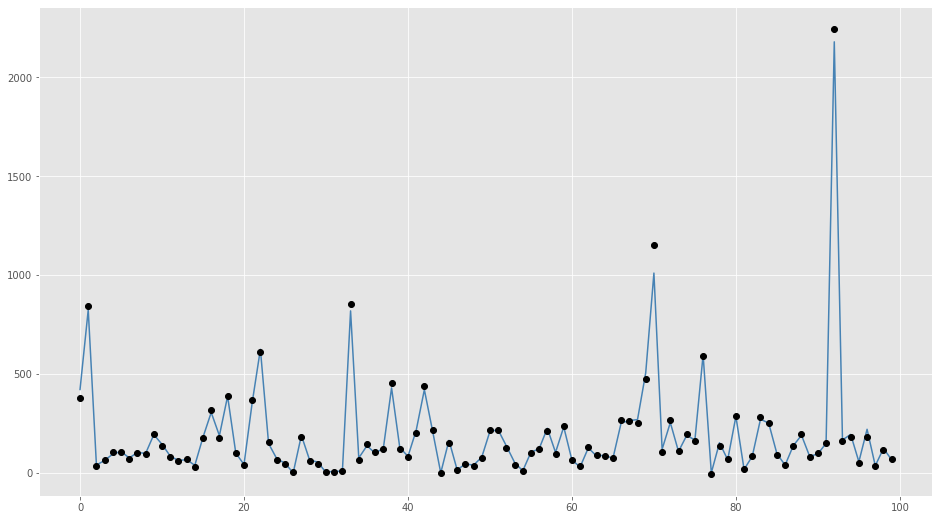

In [216]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predict.tolist()).plot(marker="o", linewidth=0, color='black')

## MODELO ELABORADO EN CLASES (WLS)

In [217]:
# División de los datos en train y test
# ==============================================================================
X = data[['Total Interactions', 'like', 'comment']]
y = data['share']


# Doc: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html
from sklearn.model_selection import train_test_split as tts

# 80% de las observaciones quedan para el conjunto de entrenamiento y 20% para el conjunto de prueba:

x_ent, x_test, y_ent, y_test = tts(X, y, train_size=0.8, random_state=42, shuffle=True)

print(x_ent.shape, x_test.shape)

(400, 3) (100, 3)


In [218]:
from scipy import stats
from statsmodels.iolib.table import (SimpleTable, default_txt_fmt)


nsample = len(x_ent)
w = np.ones(nsample)
w[nsample * 6//10:] = 3

mod_wls = sm.WLS(y_ent, x_ent, weights=1./(w ** 2))
res_wls = mod_wls.fit()
print(res_wls.summary())

                                 WLS Regression Results                                
Dep. Variable:                  share   R-squared (uncentered):                   1.000
Model:                            WLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          1.503e+31
Date:                Tue, 20 Jul 2021   Prob (F-statistic):                        0.00
Time:                        20:31:14   Log-Likelihood:                          11075.
No. Observations:                 400   AIC:                                 -2.214e+04
Df Residuals:                     397   BIC:                                 -2.213e+04
Df Model:                           3                                                  
Covariance Type:            nonrobust                                                  
                         coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------

In [219]:
# Evaluación con el set test:
# Utilizar el modelo para generar las predicciones:

y_predictWLS = res_wls.predict(x_test)


# Calculamos el Error Cuadrático Medio (MSE = Mean Squared Error)
mse = mean_squared_error(y_true = y_test, y_pred = y_predictWLS)

# La raíz cuadrada del MSE es el RMSE
rmse = np.sqrt(mse)
print('Error Cuadrático Medio (MSE) = ' + str(mse))
print('Raíz del Error Cuadrático Medio (RMSE) = ' + str(rmse))
print(40*'*')
print('R2: ', res_wls.rsquared)

Error Cuadrático Medio (MSE) = 1.3037756616077333e-26
Raíz del Error Cuadrático Medio (RMSE) = 1.1418299617752782e-13
****************************************
R2:  1.0


<AxesSubplot:>

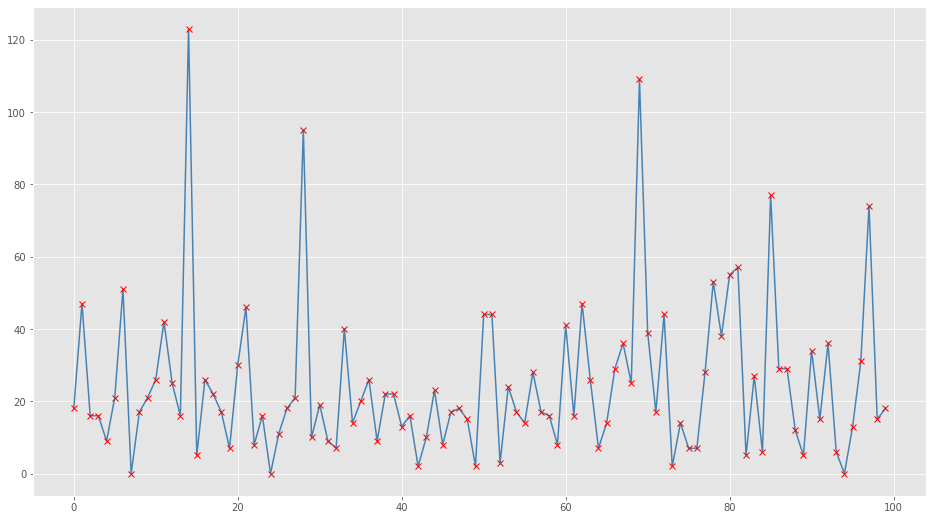

In [221]:
# Visualización valores reales vs predichos por el modelo de regresión:

pd.Series(y_test.tolist()).plot(color='steelblue')
pd.Series(y_predictWLS.tolist()).plot(marker="x", linewidth=0, color='red')


# Conclusiones
- Es recomendable usar variedad de metodos de reducción de dimensionamiento ya que cuando se trata de datasets con una densidad grande de variables, e interpretar cuales pueden ser las mejores soluciones o modelos a utilizar, debido a que los datasets están distribuidos de distintas maneras.
- En el caso de LDA funciona mejor que PCA si la distribución de los datos es uniforme, no obstante si los datos son muy irregular se recomienda utilizar PCA.
- PCA no depende de las variables dependientes en este caso Y, por lo contrario LDA necesita de la variable dependiente para su modelo y usarlo como discriminante lineal, en otras palabras PCA necesita una unica entrada (variables independientes) y LDA necesita 2 (variable dependiente e independiente).
- Para este caso los resultados varían ligeramente porque el error cuadrático no es tan bajo y que para el modelo WLS se tomaron 3 variables independientes (Alto coeficiente de correlación) y para la reduccón de dimensionamiento se tomaron todas las variables (Altos y Bajos coeficientes de correlación).